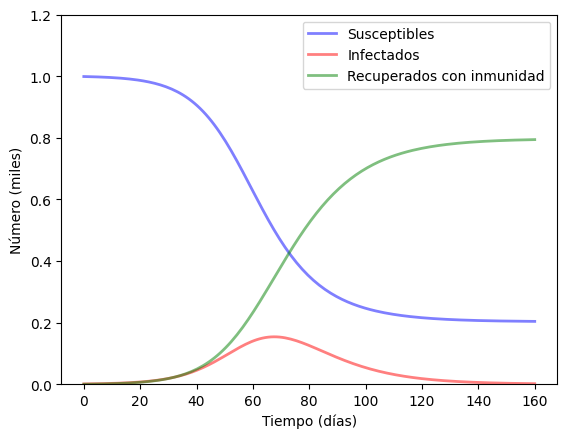

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Población total (N)
N = 1000

# Número inicial de individuos infectados y recuperados (I0 y R0)
I0, R0 = 1, 0

# El resto, S0, es susceptible a la infección inicialmente
S0 = N - I0 - R0

# Tasa de contacto (beta) y tasa media de recuperación (gamma) (en 1/días)
beta, gamma = 0.2, 1./10

# Puntos de tiempo (en días)
t = np.linspace(0, 160, 160)

# Ecuaciones diferenciales del modelo SIR
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Condiciones iniciales
y0 = S0, I0, R0

# Integra las ecuaciones SIR en la cuadrícula de tiempo, t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Grafica los datos para S(t), I(t) y R(t)
plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptibles')
plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infectados')
plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recuperados con inmunidad')
plt.xlabel('Tiempo (días)')
plt.ylabel('Número (miles)')
plt.ylim(0, 1.2)
plt.legend()
plt.show()
